# View the result of many simulations

In [1]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from scipy.interpolate import interp1d

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# config LSST

In [2]:
all_filternum = {'u':1, 'g':2, 'r':3, 'i':4, 'z':5, 'y':6}
all_filtercolors = {'u':'b', 'g':'g', 'r':'r', 'i':'y', 'z':'grey', 'y':'k'}
all_filtername= ['u','g','r','i','z','y']

In [1]:
NBFILT=len(all_filternum)

NameError: name 'all_filternum' is not defined

# Input Data

In [4]:
path_data="/sps/lsst/data/PCWG_MiniDataChallenge/pickles_uvk/2018-07-08/"

In [5]:
dirs = os.listdir(path_data)

In [6]:
selected_files = []
for thefile in dirs:
    if thefile.find("info")!=-1:
        selected_files.append(thefile)

In [7]:
selected_files.sort()


In [8]:
all_data = []
for thefile in selected_files:
    thefullfilename=os.path.join(path_data,thefile)
    data=np.loadtxt(thefullfilename)
    all_data.append(data)

In [9]:
all_data[0].shape

(912, 8)

In [10]:
sed_idx=0

In [11]:
data=all_data[0]

# data field
| airmass    |    filter(1..6)  |  vaod   |  o3   |   pwv  |   clouds    |    instrum-mag (ADU) |       error-mag |

In [12]:
df=pd.DataFrame(data)

In [13]:
df.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e09740f0>]], dtype=object)

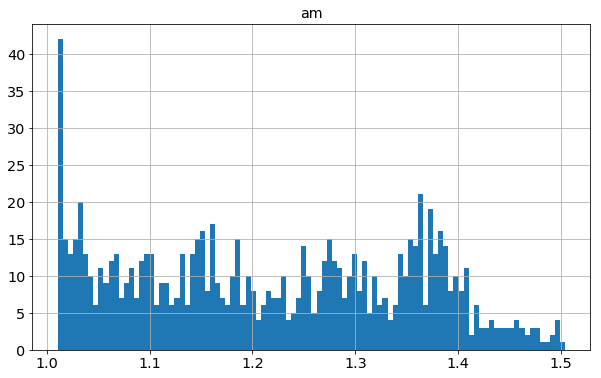

In [14]:
df.hist("am",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e0853048>]], dtype=object)

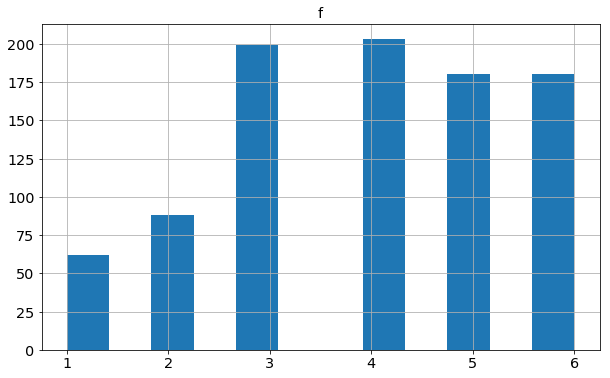

In [15]:
df.hist("f",bins=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92d68b3080>]], dtype=object)

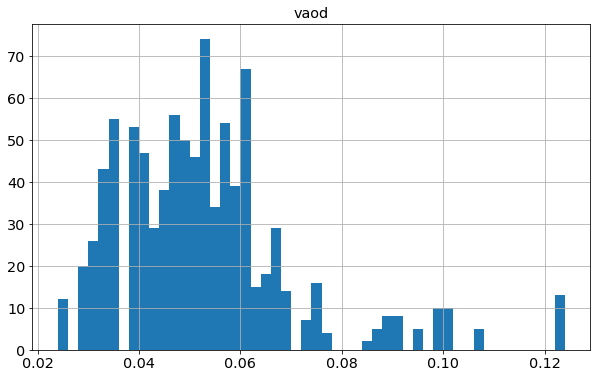

In [16]:
df.hist('vaod',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92d4107a90>]], dtype=object)

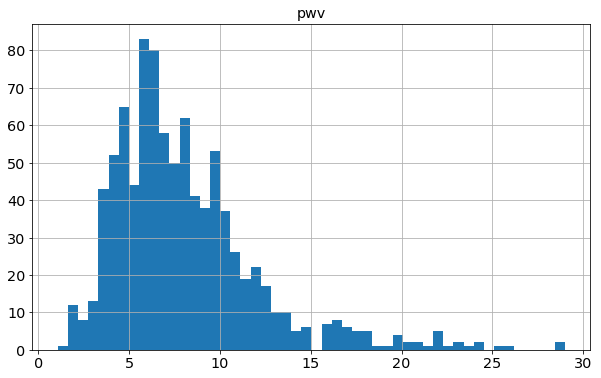

In [17]:
df.hist('pwv',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92afa06d30>]], dtype=object)

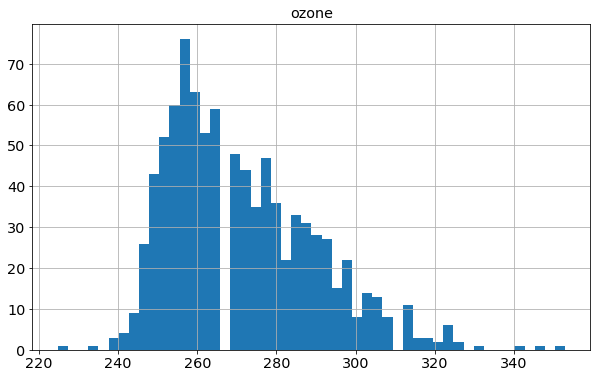

In [18]:
df.hist('ozone',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92af79f1d0>]], dtype=object)

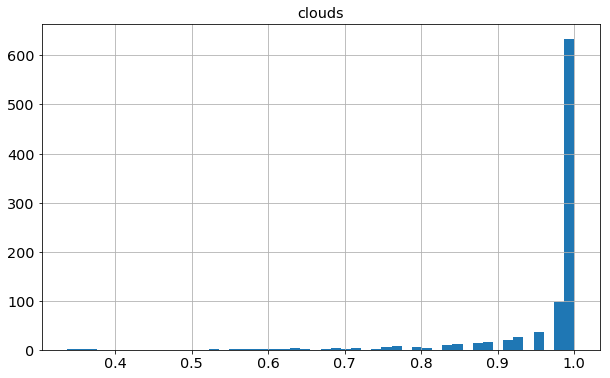

In [19]:
df.hist('clouds',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92af691a58>]], dtype=object)

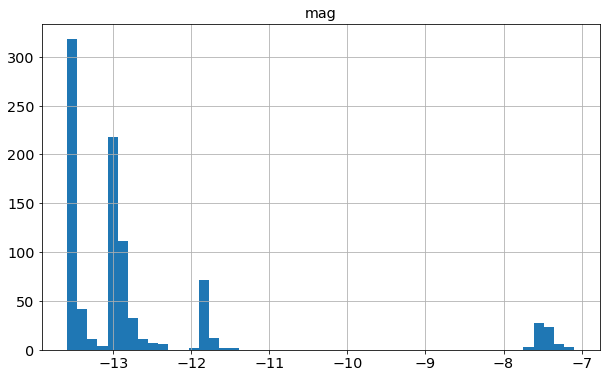

In [20]:
df.hist('mag',bins=50)

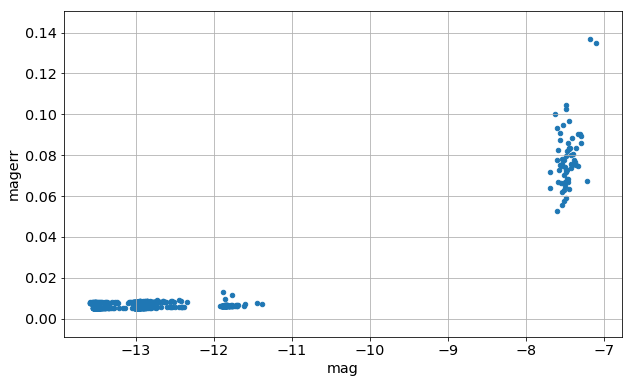

In [21]:
df.plot.scatter(x='mag',y='magerr',grid=True)

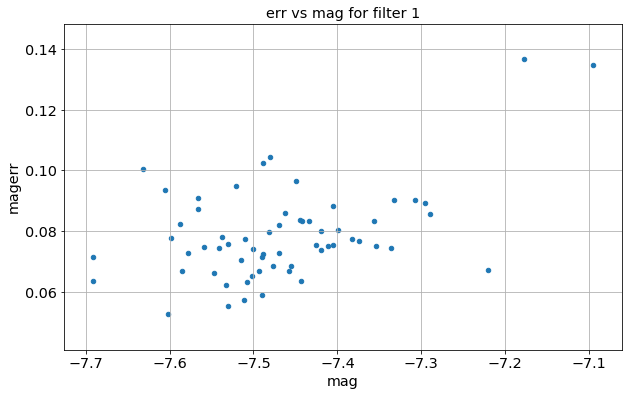

In [22]:
df.loc[(df.f == 1) & (df.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)

In [23]:
len(all_data)

12961

In [24]:
NBSED=len(all_data)

# Concatenate All Data Samples

In [25]:
all_df = []
for ised in np.arange(NBSED):
    df2=pd.DataFrame(all_data[ised])
    df2.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']
    all_df.append(df2)
    
    #df2.loc[(df2.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)
dft=pd.concat(all_df)


# Plot error vs Magnitude

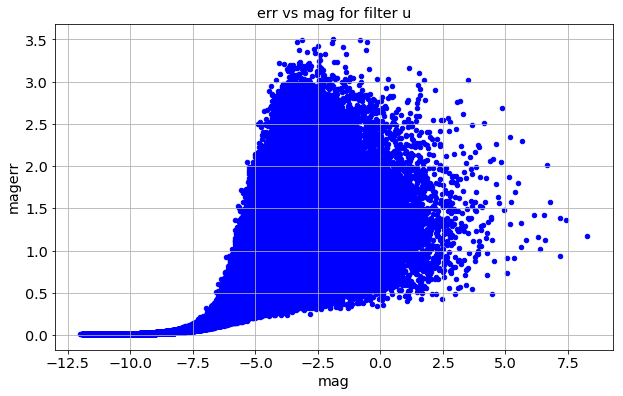

In [39]:
dft.loc[(dft.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter u',color='b',grid=True)

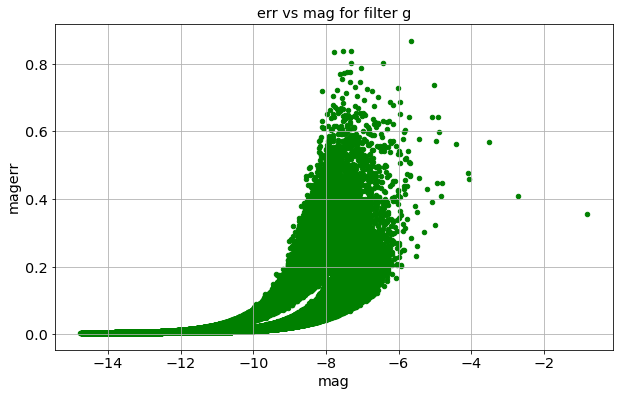

In [27]:
dft.loc[(dft.f == 2)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter g',color='g',grid=True)

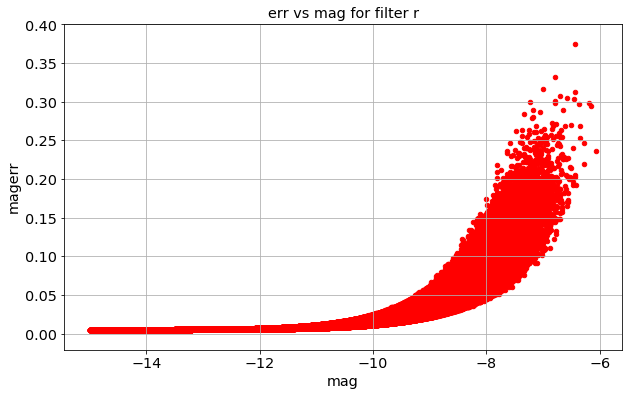

In [28]:
dft.loc[(dft.f == 3)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter r',color='r',grid=True)

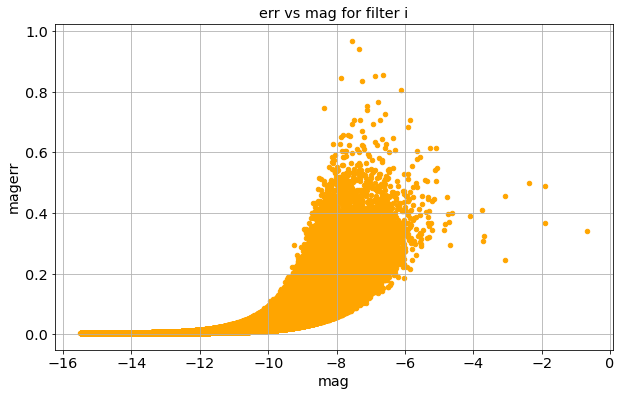

In [29]:
dft.loc[(dft.f == 4)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter i',color='orange',grid=True)

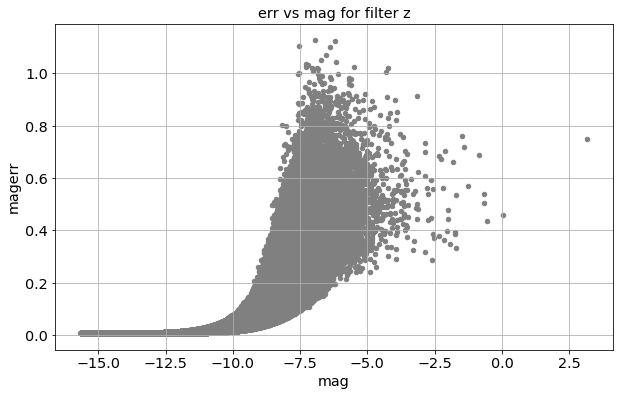

In [30]:
dft.loc[(dft.f == 5)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter z',color='grey',grid=True)

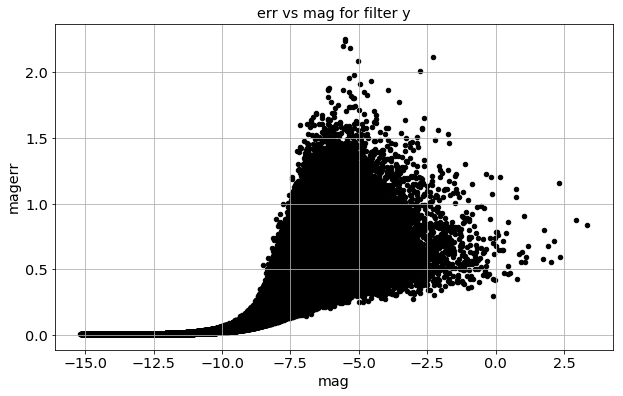

In [31]:
dft.loc[(dft.f == 6)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter y',color='k',grid=True)

(-13, 2)

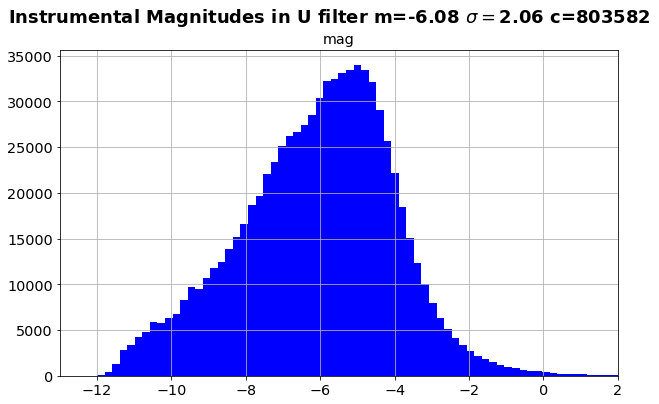

In [53]:
dfu=dft.loc[df['f']==1]
m,sig,c=dfu['mag'].describe()['mean'],dfu['mag'].describe()['std'],int(dfu['mag'].describe()['count'])
dft.loc[(dft.f == 1)].hist('mag',bins=100,grid=True,color='b')
thetitle="Instrumental Magnitudes in U filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(-13,2)

# Plot Magnitudes

(-15, -6)

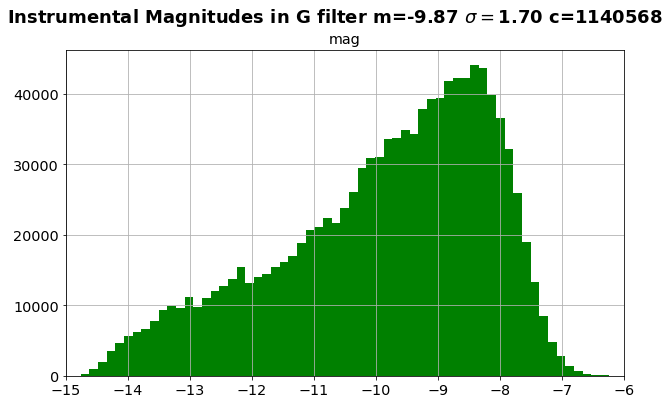

In [64]:
dfg=dft.loc[df['f']==2]
m,sig,c=dfg['mag'].describe()['mean'],dfg['mag'].describe()['std'],int(dfg['mag'].describe()['count'])
dft.loc[(dft.f == 2)].hist('mag',bins=100,grid=True,color='g')
thetitle="Instrumental Magnitudes in G filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(-15,-6)

(-15, -7)

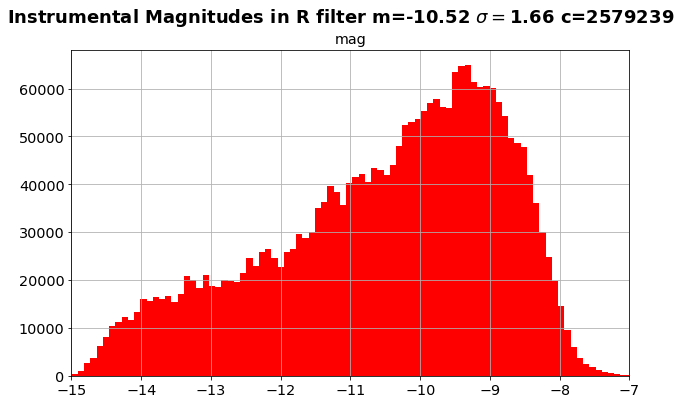

In [63]:
dfr=dft.loc[df['f']==3]
m,sig,c=dfr['mag'].describe()['mean'],dfr['mag'].describe()['std'],int(dfr['mag'].describe()['count'])
dft.loc[(dft.f == 3)].hist('mag',bins=100,grid=True,color='r')
thetitle="Instrumental Magnitudes in R filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(-15,-7)

(-16, -6)

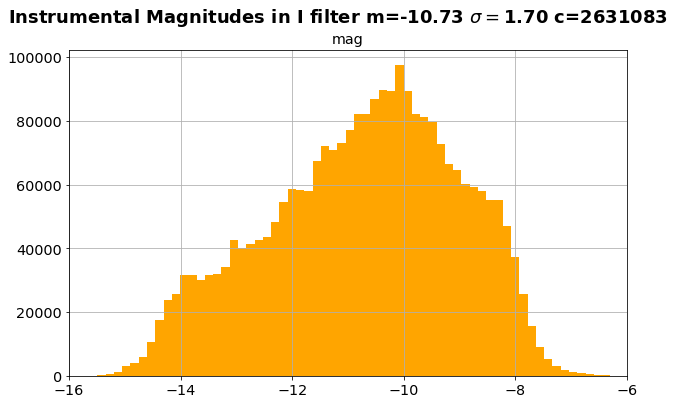

In [62]:
dfi=dft.loc[df['f']==4]
m,sig,c=dfi['mag'].describe()['mean'],dfi['mag'].describe()['std'],int(dfi['mag'].describe()['count'])
dft.loc[(dft.f == 4)].hist('mag',bins=100,grid=True,color='orange')
thetitle="Instrumental Magnitudes in I filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(-16,-6)

(-16, -5)

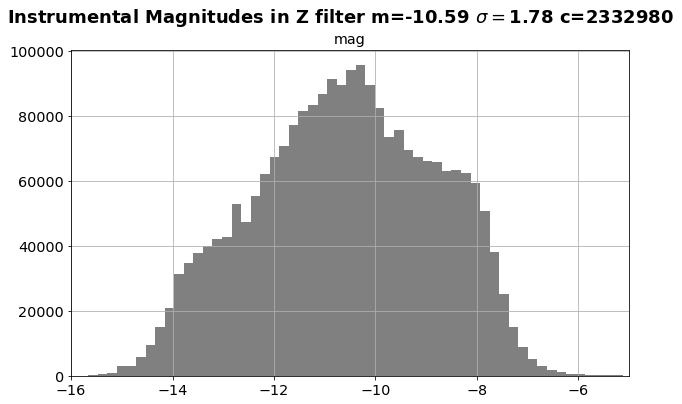

In [61]:
dfz=dft.loc[df['f']==5]
m,sig,c=dfz['mag'].describe()['mean'],dfz['mag'].describe()['std'],int(dfz['mag'].describe()['count'])
dft.loc[(dft.f == 5)].hist('mag',bins=100,grid=True,color='grey')
thetitle="Instrumental Magnitudes in Z filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(-16,-5)

(-15, -2)

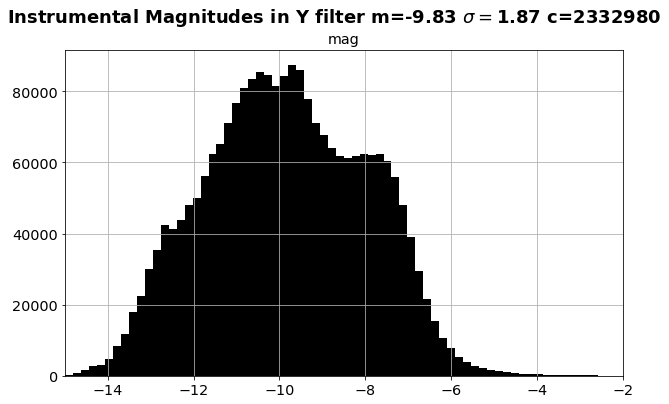

In [60]:
dfy=dft.loc[df['f']==6]
m,sig,c=dfy['mag'].describe()['mean'],dfy['mag'].describe()['std'],int(dfy['mag'].describe()['count'])
dft.loc[(dft.f == 6)].hist('mag',bins=100,grid=True,color='k')

thetitle="Instrumental Magnitudes in Y filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(-15,-2)